<a href="https://colab.research.google.com/github/Paloma-Moya-Tudela/AA_PRACTICA1_GRUPO_2/blob/main/A_PRACTICA1_GRUPO_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GRUPO 2**

Paloma Moya Tudela

María García Rodríguez

Elena Peral Pastor

Sofía Peña González



# RESUMEN

En la asignatura de “Aprendizaje Automático”, estamos aprendiendo acerca de una utilidad cada vez más desarrollada y puesta en práctica: las Redes de Neuronas Artificiales.

Este trabajo tiene como fin plasmar los conocimientos teórico-prácticos estudiados en clase aplicándolos a un ejemplo concreto: el “data set” de la empresa Zalando. Se ejecutarán diversas funciones y se irán extrayendo conclusiones que nos ayuden a comprender el funcionamiento interno de la red.


# ÍNDICE



*   Introducción
*   Resolución
*   Conclusiones
*   Reflexiones
*   Referencias Bibliográficas







# INTRODUCCIÓN

Las Redes de Neuronas Artificiales son una herramienta muy útil, y cada vez más utilizada, para resolver problemas cotidianos. Sin embargo, están siendo también de gran ayuda para hallar las respuestas a cuestiones increíblemente complejas.

La fuerte componente biológica sobre la que se sustenta llama considerablemente la atención, y es precisamente esta característica lo que las hace únicas.

Sin darnos cuenta, estas redes están siendo implementadas en multitud de campos, muchos de los cuales nos afectan – de manera directa o indirecta – en nuestro día a día. Tanto es así, que las empresas las implementan con el objetivo de ser capaces de lograr llamativos beneficios gracias a la eficacia de este método. Pueden ser empresas de distintas áreas; empresas como Zalando (www.zalando.com), una tienda de moda online alemana especializada en ventas de ropa y zapatos. Estos productos se van a trabajar a lo largo de este proyecto.

Este estudio se centrará en la manipulación de una red neuronal y en la interacción con sus diferentes componentes. De esta forma, será importante probar diferentes métodos de llevar a cabo una misma función, y así ser capaces de visualizar cómo funciona cada herramienta interna hasta llegar a las condiciones más óptimas posibles. Por lo tanto, esta práctica servirá de gran ayuda para entender el comportamiento de una Red de Neuronas Artificiales.


# RESOLUCIÓN

El primer paso será comprender el enunciado y extraer los datos que se nos aportan.

**PROBLEMA:**

* Reconocer y clasificar imágenes - en escala de grises - de ropa (28 x 28 píxeles) en sus diferentes tipologías (10). Este modelo será definido, configurado, entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.
* Se dispone de 70k imágenes del conjunto de datos de Fashion-MNIST: artículos de Zalando, una tienda de moda online alemana especializada en ventas de ropa y zapatos. Se usarán 60K imágenes para el entrenamiento de la red, y 10K imágenes para evaluar la precisión con la que la red aprende a clasificarlas.


Una vez se tienen claro los materiales con los que se trabajará, se podrá empezar a incorporar código. Sin embargo, antes de comenzar importemnos qyuras y el resto de librerías necesarias para la red neuronal, asegurando que es la versión 2.0.0 (o superior) de TensorFlow.


**DISEÑO, ENTRENAMIENTO Y TEST DE UN SISTEMA DE REDES DE NEURONAS ARTIFICIALES**


In [ ]:
# 1._ IMPORTAMOS KERAS
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

import numpy as np
import pandas as pd
import matplotlib.image as mpim
import matplotlib.pyplot as plt
%matplotlib inline

from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, InputLayer

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


A continuación, cargamos el conjunto de datos  MNIST en Keras para poder visualizar los datos.


In [ ]:
# 2.- CARGAMOS EL CONJUNTO DE DATOS MINIST EN KERAS
# mnist = tf.keras.datasets.mnist
from keras.datasets import mnist

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


Al cargar el set de datos retorna cuatro arreglos en NumPy:
- `train_images` y `train_labels` son el **conjunto de entrenamiento** (los datos de los que aprenderá el modelo).
- `test_images` y `test_labels` son el conjunto de pruebas (los datos con los que testearemos el modelo ya entrenado).
- Las imágenes están **codificadas** como matrices `Numpy`, y las etiquetas son un vector de números con valores entre el 0 y el 9 (imágenes y etiquetas tienen una correspondencia 1 a 1) 

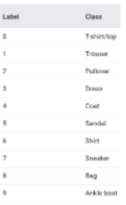

Como los `Class names` no están incluidos los podremos a mano en el siguiente código: 

In [ ]:
nombres = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Una vez tenemos los datos preparados se puede proceder a echarle un vistazo a los **datos de entrenamiento**
## Pre-procesamiento del set de datos

In [ ]:
print(train_images.shape)

(60000, 28, 28)


Esto nos indica que el data set de los **datos de entrenamiento** contiene 60K elementos de 28x28, tal cual como indica el enunciado. Hagamos los mismos con los datos con los que estamos el modelo entrenado:


In [ ]:
print(test_images.shape)

(10000, 28, 28)


Apreciamos que es un array de 10K elementos de 28x28.


A continución, veamos la imágenes de otra forma, por ejemplo veamos la matriz de la imágen número 0

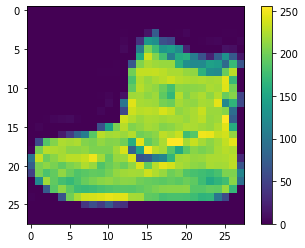

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Nos encontramos un porblema, se observa que los valores van de 0 a 250 y para aplicarlos a la red neuronal deben ser valores entre 0 y 1 para que los datos de entrenamiento y de test sean porcesados de la misma manera. Arreglemolos de la siguiente forma:

In [ ]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Volvamos a mostrar la imagen, los valores serán entre 0 y 1:

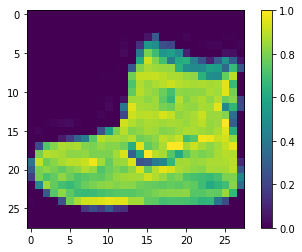

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

También podemos visalizarla en forma de matriz, eavmos el ejemplo 2000, que debe ser similar a la imagen de un sneaker, ahora los valores seguirán estando entre 0 y 1:



In [ ]:
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[20000]))

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]

Por último, antes de comenzar con la red neuronal incluimos una representación de los 10 primeros elemento con sus correspondientes etiquetas, de esta forma nos aseguramos de que el data set es correcto.

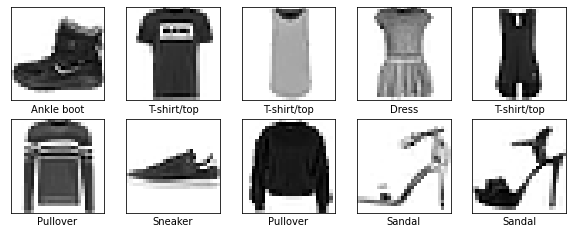

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(nombres[train_labels[i]])
plt.show()

## Configuración de los casos

***1. Configurar y entrenar los siguientes modelos de red de neuronas, todos con función de pérdida ‘categorical_crossentropy’, métrica de precisión y 5 épocas, analizando y reflexionando sobre los resultados.***

**1. Configurar y entrenar los siguientes modelos de red de neuronas, todos con función de pérdida ‘categorical_crossentropy’, métrica de precisión y 5 épocas, analizando y reflexionando sobre los resultados.**


En este apartado, se dará a la RNA los datos de entrenamiento `train_images` y `train_labels`. Esta aprenderá a asociar imágenes y etiquetas, por lo que pediremos a la RNA que haga predicciones para `test_images` y comprobaremos si estas predicciones coinciden con las etiquetas de `test_labels`.

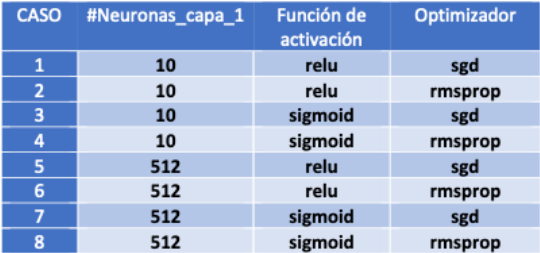

**Caso 1**

In [ ]:
from keras.utils.np_utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu')
])
model1.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


En primer lugar transformamos las variables `train_labels` y `train_labels` a categóricas para hacer uso de **one-hot encoding**, el cual trata de transformar las etiquetas en un vector de tantos ceros como el número de etiquetas distinta, y que contiene el valor de 1 en el índice que le corresponde al valor de la etiqueta. 

Para la primera capa se incluye `tf.keras.layers.Flatten`, este transforma el formato de las imagenes, las cuales estaán en 28x28, a un arreglo 1D, podriamos decir que o aplasta todo en un mismo array: 28*28 = 784 pixeles.


Por tanto, esta capa simplemente las aline, no tiene parametros que aprender, es decir, sirve simplemente para dar la forma que buscamos al set de datos.

En la siguiente caca tenemos 10 nodos con función de activación 'relu',la cual permite a las redes neuronales modificar los valores de entrada llevando los valores negativos a 0 y utilizando únicamente los positivos, devolviendo esos mismos valores positivos.

El optimizador es Sgd, este es un tipo de optimizado que permite realizar una aproximación estocástixa del descenso del gradiente sustituyendo el gradiente real por su estimación.

La función de pérdida es `categorical_crossentropy`,  cuya función es producir una matriz one-hot, por ello es que las variable son categóricas. Los valores de la matriz contienen la coincidencia probable para cada categoría.

A continuación compilamos el modelo con 5 épocas, cada una con tamaño de 128.

In [ ]:
model1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.1493
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000


Observamos que este modelo tiene  una baja precisión pues el método de entrenamiento no es adecuado. Llama la atención que la precisión en la primera época es mayor que en las siguientes, que es un síntoma de sobreentrenamiento.

**Caso 2**

In [ ]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu')
])
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Para el segundo modelo se vuelve a hacer uso de todolo anterior, lo único que varía es el optimizador.

El optimizador rmsprop, este normaliza el gradiente de la raíz cuadrada del valor medio de los cuadrados. De esta forma se consideran los gradientes más recieintes.



In [ ]:
model2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.1198
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.1000
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: nan - accuracy: 0.1000
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.1000


En este caso ocurre lo mismo que el anterior, por lo que no parece que el cambio de los optimizadores tenga ningún efecto. La pérdida en abbos casos ens Nan.

**Caso 3**

In [ ]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid')
])
model3.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

En este caso, el número de capas es 10 (por tanto la profundidad del modelo sigue invariante), con una función de activación `sigmoidea`, 



In [ ]:
model3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 1.1752 - accuracy: 0.6351
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.7916 - accuracy: 0.7422
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.7030 - accuracy: 0.7734
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.6545 - accuracy: 0.7891
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.6223 - accuracy: 0.7995


A diferencia de los anteriores modelos, esta función de activación es considerablemente mejor, pues llega a tener una precisión del casi 80%. Por ahora este modelo es el más adecuado, lo cual significa que una función de activación sigmoidea es preferible para entrenar la RNA.

**Caso 4**

In [ ]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid')
])
model4.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Para el segundo modelo se vuelve a hacer uso de todolo anterior, lo único que varía es el optimizador, que vuelve a ser rmsprop.

In [ ]:
model4.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.6921 - accuracy: 0.7705
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4956 - accuracy: 0.8337
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4620 - accuracy: 0.8440
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.4443 - accuracy: 0.8491
Epoch 5/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4332 - accuracy: 0.8522


Esta salida da un 85% de precisión, por lo que con un optimizador rmsprop, para una función de activación sigmoidea obtenemos una RNA mejor entrenada, pues la precisión es mayor y la pérdida es menor. Lo cual nos indica que esta combinación sobrepone a la anterior.

**Caso 5**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu')
])
model5.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

A continuación variamos de 10 capas a 512 capas. Al igual que las anteriores, el  set de datos ha pasado por una capa Flatten(). Los siguientes 4 casos son idénticos a los anteriores. Unicamente varía el número de capas.


In [ ]:
model5.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 5.7648 - accuracy: 0.1916
Epoch 2/5
469/469 [==============================] - 5s 12ms/step - loss: 4.5746 - accuracy: 0.2585
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 3.8332 - accuracy: 0.1836
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 3.8606 - accuracy: 0.1824
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 3.7991 - accuracy: 0.1792


Observamos que con la misma estructura que en el *Caso 1* pero con un mayor número de capas la precisión mejora ligeramente. 

**Caso 6**

In [ ]:
model6 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu')
])
model6.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model6.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 8s 16ms/step - loss: 7.5468 - accuracy: 0.1146
Epoch 2/5
469/469 [==============================] - 7s 14ms/step - loss: 6.4689 - accuracy: 0.1112
Epoch 3/5
469/469 [==============================] - 7s 16ms/step - loss: 6.4542 - accuracy: 0.1099
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 6.4235 - accuracy: 0.1114
Epoch 5/5
469/469 [==============================] - 6s 12ms/step - loss: 6.3487 - accuracy: 0.1193


En este caso, con 512 capas vemos también una mejora de la precisión en comparación al *Caso 2*, sin embargo, los valores de las pérdidas son altos. 

**Caso 7**

In [ ]:
model7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid')
])
model7.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model7.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 2000.4717 - accuracy: 0.7069
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 1245.8314 - accuracy: 0.7650
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 1199.5796 - accuracy: 0.7732
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 1110.6183 - accuracy: 0.7804
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 1050.7321 - accuracy: 0.7848


En este caso la identidad del *Caso 3* con 512 capas empeora, pues la precisión es vagamente menor y la función de pérdida se dispara. Al contrario de lo que s epodía pensar, un aumento del número de capas no significa que sea óptimo.

**Caso 8**

In [ ]:
model8 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid')
])
model8.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model8.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 19.6566 - accuracy: 0.7042
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 14.2635 - accuracy: 0.7657
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 13.2026 - accuracy: 0.7797
Epoch 4/5
469/469 [==============================] - 6s 12ms/step - loss: 12.8997 - accuracy: 0.7822
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 12.4078 - accuracy: 0.7886


En este caso, al igual que el anterior, tanto las pérdidas como la precisión empeoran.

Una vez estudiados los 8 casos, vemos que lo más óptimo es  hacer uso de la función de activación sigmoidea con 10 capas, una función de pérdida categorical_crossentropy y el optimizador:rmsprop.

## Salidas

***2. Explicar la salida de la llamada model.summary() de cada uno de los 8 casos.***

In [ ]:
model1.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.summary() 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model5.summary() 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model6.summary() 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model7.summary() 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model8.summary() 

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


##Análisis (5 épocas vs 25 épocas)

***3. Analizar e interpretar los resultados del caso 2 y el 7 frente a sus originales si se multiplica por 5 las épocas de entrenamiento (25).***

**Caso 2**

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model2_2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='relu')
])
model2.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 2s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 2/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 3/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 4/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 5/25
469/469 [==============================] - 2s 4ms/step - loss: nan - accuracy: 0.1000
Epoch 6/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 7/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 8/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 9/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 10/25
469/469 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.1000
Epoch 11/25
469/469 [========

El *caso 2*  sigue siendo mal entrenado a pesar del aumento de las épocas, la precisión es constante y muy baja.

Por otro lasdo, la función de pérdida da Nan continuamente, que como ha sido expuesto antes, significa un entrenamineto pobre.

Esto indica que con esta configuración de modelo de red y con un mayor número de épocas obtenemos una RNA **peor** entrenada.


**Caso 7**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
model7_7 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='sigmoid')
])
model7.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model7.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 6s 12ms/step - loss: 1029.0684 - accuracy: 0.7892
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 1054.9014 - accuracy: 0.7903
Epoch 3/25
469/469 [==============================] - 4s 9ms/step - loss: 1046.9583 - accuracy: 0.7915
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 1020.4102 - accuracy: 0.7917
Epoch 5/25
469/469 [==============================] - 5s 10ms/step - loss: 1065.0830 - accuracy: 0.7913
Epoch 6/25
469/469 [==============================] - 4s 9ms/step - loss: 1031.7791 - accuracy: 0.7933
Epoch 7/25
469/469 [==============================] - 4s 9ms/step - loss: 992.4521 - accuracy: 0.7961
Epoch 8/25
469/469 [==============================] - 6s 12ms/step - loss: 1020.7779 - accuracy: 0.7958
Epoch 9/25
469/469 [==============================] - 6s 12ms/step - loss: 991.5716 - accuracy: 0.7982
Epoch 10/25
469/469 [==============================] - 7s 15ms/step - l

El *caso 7* sí que mejora levemente, pues la función de pércdida es menor a la vez que la precisión aumenta. 

Esto indica que con esta configuración de modelo de red y con un mayor número de épocas obtenemos una RNA **mejor** entrenada.

## Comparación de rendimiento

***4. Evaluar cada uno de los 8 modelos comparando el rendimiento del modelo en el conjunto de datos de prueba.***

In [ ]:
# 8.- VERIFICAMOS NUESTRO MODELO YA ENTRENADO, CONTRA EL CONJUNTO DE PRUEBAS
test_labels = to_categorical(test_labels)
test_loss1, test_acc1 = model1.evaluate(test_images, test_labels)
test_loss2, test_acc2 = model2.evaluate(test_images, test_labels)
test_loss3, test_acc3 = model3.evaluate(test_images, test_labels)
test_loss4, test_acc4 = model4.evaluate(test_images, test_labels)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
test_loss5, test_acc5 = model5.evaluate(test_images, test_labels)
test_loss6, test_acc6 = model6.evaluate(test_images, test_labels)
test_loss7, test_acc7 = model7.evaluate(test_images, test_labels)
test_loss8, test_acc8 = model8.evaluate(test_images, test_labels)

#print('test_loss8:', test_loss ,'test_acc8:', test_acc)  con esto se muestran mas decimales a rabazo

313/313 [==============================] - 1s 4ms/step - loss: 22.6539 - accuracy: 0.7288


Vemos que los dos primeros modelos son muy poco precisos, al igual que el 5 y el 6. El modelo más óptimo es el modelo 4 (loss: 76.3594 - accuracy: 0.8141), que coincide con lo concluido anteriormente.

## Predicciones

***5. Usar cada uno de los 8 modelos para hacer predicciones sobre la 6ª imagen de test (test_images[5]).***

La función de pérdida es `categorical_crossentropy`,  cuya función es producir una matriz one-hot, por ello es que las variable son categóricas. Los valores de la matriz contienen la coincidencia probable para cada categoría.

\Para comenzar, visualicemos de qué imagen trata la imagen 6. Vemos que es un pantalón, que corresponde a la categoría 1.

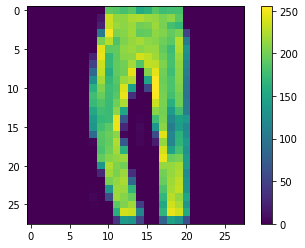

In [ ]:
plt.figure()
plt.imshow(test_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

Las predicciones serán arreglos de 10 para los primeros 4 modelos y de 512 para los restantes.

**Caso 1**

In [ ]:
prediction1 = model1.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
prediction1[5]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [ ]:
np.argmax(prediction1[5])

0

El modelo ha predicho que es la categoría 0, una camiseta, lo cual es erróneo. Como se había concluido anteriormente que este modelo había sido mal entrenado, que la salida no sea correcta es lógico.

**caso2**

In [ ]:
prediction2 = model2.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
prediction2[5]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=float32)

In [ ]:
np.argmax(prediction2[5])

0

El modelo ha predicho que es la categoría 0, una camiseta, lo cual es erróneo. Al igual que el anterior, este modelo había sido mal entrenado, que la salida no sea correcta es lógico.

**caso3**

In [ ]:
prediction3 = model3.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
prediction3[5]

array([1., 1., 1., 1., 1., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(prediction3[5])

0

El modelo no tenía una precisón lo suficientemente elevada, por lo que la salida no ha sido acertada, sin embargo, el el array se puede apreciar que el modelo ha hecho varias predicciones en categorías, siendo la más alta la categoría 0.

**caso4**

In [ ]:
prediction4 = model4.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [ ]:
prediction4[5]

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(prediction4[5])

1

Este es el modelo con mayor precisión, la salida es la correcta, ha predicho que es de la categoría 1 y ha acertado. Sin embargo también ha dado valores a otras categorías. Por ejemplo, a la categoría 4. 

**caso5**

In [ ]:
prediction5 = model5.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
prediction5[5]

array([1273.7 , 1760.09, 1005.85, 2880.98,  244.68, 1063.66,  921.7 ,  341.28, 1135.23,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
          0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,
      

In [ ]:
np.argmax(prediction5[5])

3

El modelo 5 ha predicho que la mayor probabilidad es que sea de la categoría 3, pero también se puede ve en la matriz que ha dado valores a otras categorías.

**caso6**

In [ ]:
prediction6 = model6.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
prediction6[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
np.argmax(prediction6[5])

0

El modelo 6 , al igual que el 5 es poco preciso y al estar mal entrendo no ha dado valores a ninguna categoría-

**caso7**

In [ ]:
prediction7 = model7.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
prediction7[5]

array([1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  ,
       1.  , 0.  , 1.  , 0.94, 0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  ,
       1.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 1.  ,
       1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  , 1.  , 1.  , 0.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  , 1.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  ,
       0.  , 1.  , 0.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.01, 1.  , 0.  , 0.  , 0.  ,
       0.  , 1.  , 0.  , 0.  , 0.06, 1.  , 0.4 , 0.  , 1.  , 0.  , 1.  , 1.  , 0.34, 0.  , 0.  , 0.  , 1.  , 1.  , 1.  , 0.  , 0. 

In [ ]:
np.argmax(prediction7[5])

0

Este caso da el mayor valor a la categoría 0, lo cual no es correcto, se puede ver que en la matriz da probabilidad de ser casi de todas las categorías.

**caso8**

In [ ]:
prediction8 = model8.predict(test_images)

313/313 [==============================] - 1s 4ms/step


In [ ]:
prediction8[5]

array([1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.94, 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       1.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.02, 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 1.  , 0.  , 0.  ,
       1.  , 0.  , 0.8 , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.1 , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0. 

In [ ]:
np.argmax(prediction8[5])

0

Como se vio antriormente el modelo 8 no era óptimo, se puede ver que dice que podría pertenecer a numeross categorías, lo cual es erróneo

## Gráficas


***6. Utilice el siguiente código para graficar cómo de bien o de mal se comporta el modelo para cada uno de los 8 casos.***

En las gráficas se verán los siguientes colores:

- azul = valores menores del las otras prediciones

- rojo = el valor interpretadopor el modelo
- negro= el valor de la categoría real

Incluimos las funciones necesarias en los siguientes códigos.

In [ ]:


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="blue")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('black')


En los casos se interpreta lo mismo que en le apartado anterior de forma gráfica para las 10 primeras imágenes de testeo.

El objetivo será encontrar gráficas con una única, la negra, que significa que ha acertado.

**Caso 1**

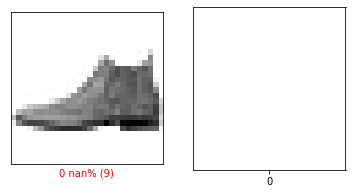

<Figure size 432x288 with 0 Axes>

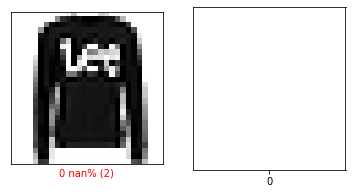

<Figure size 432x288 with 0 Axes>

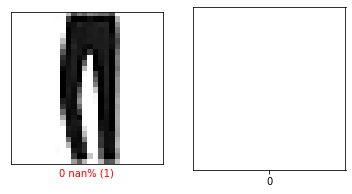

<Figure size 432x288 with 0 Axes>

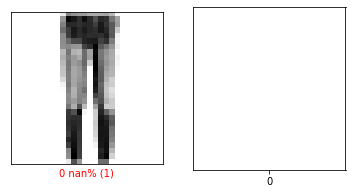

<Figure size 432x288 with 0 Axes>

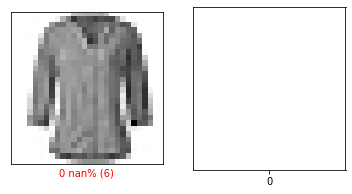

<Figure size 432x288 with 0 Axes>

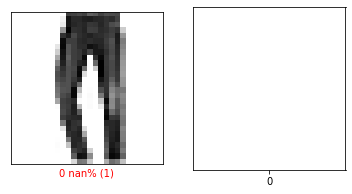

<Figure size 432x288 with 0 Axes>

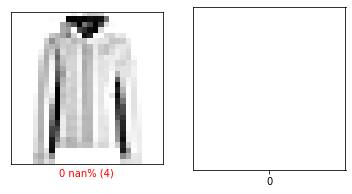

<Figure size 432x288 with 0 Axes>

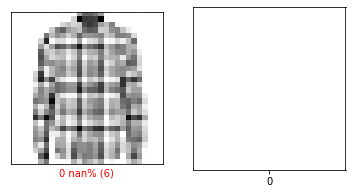

<Figure size 432x288 with 0 Axes>

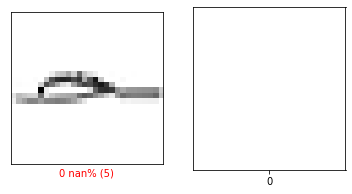

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(9):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction1[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, prediction1[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 2**

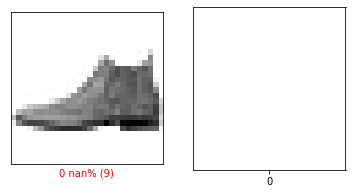

<Figure size 432x288 with 0 Axes>

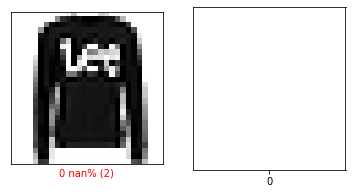

<Figure size 432x288 with 0 Axes>

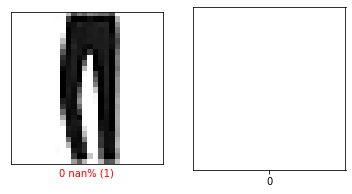

<Figure size 432x288 with 0 Axes>

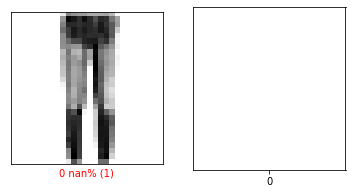

<Figure size 432x288 with 0 Axes>

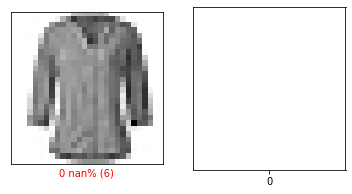

<Figure size 432x288 with 0 Axes>

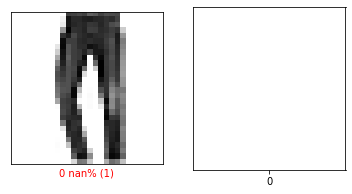

<Figure size 432x288 with 0 Axes>

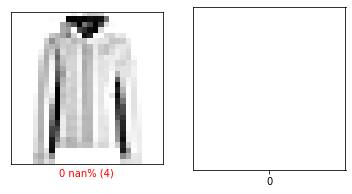

<Figure size 432x288 with 0 Axes>

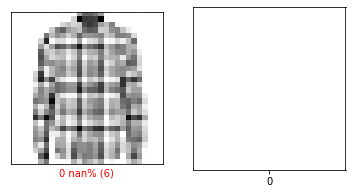

<Figure size 432x288 with 0 Axes>

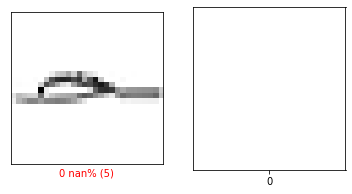

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(9):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction2[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, prediction2[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 3**

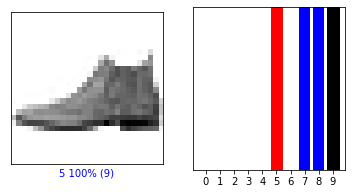

<Figure size 432x288 with 0 Axes>

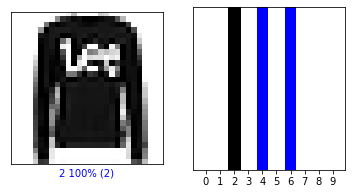

<Figure size 432x288 with 0 Axes>

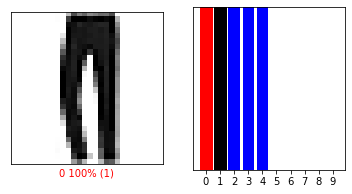

<Figure size 432x288 with 0 Axes>

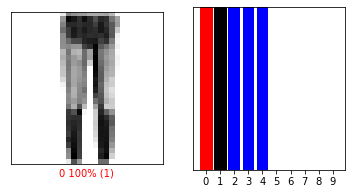

<Figure size 432x288 with 0 Axes>

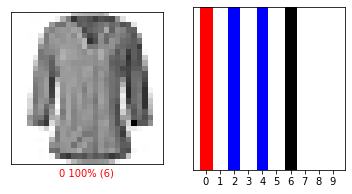

<Figure size 432x288 with 0 Axes>

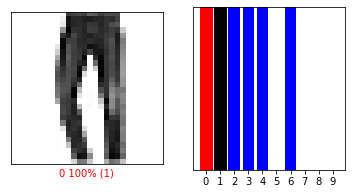

<Figure size 432x288 with 0 Axes>

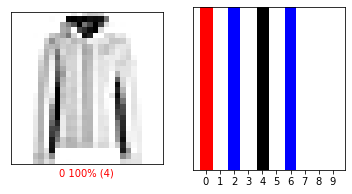

<Figure size 432x288 with 0 Axes>

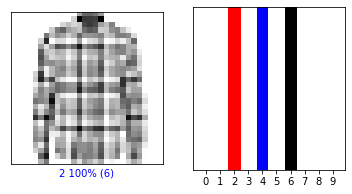

<Figure size 432x288 with 0 Axes>

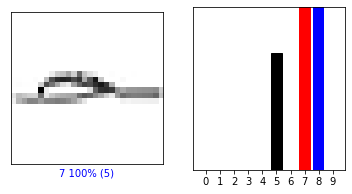

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(9):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction3[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, prediction3[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 4**

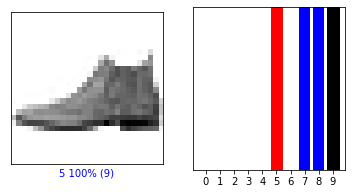

<Figure size 432x288 with 0 Axes>

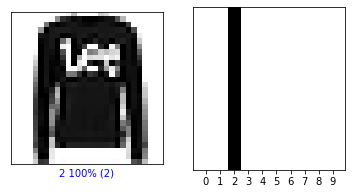

<Figure size 432x288 with 0 Axes>

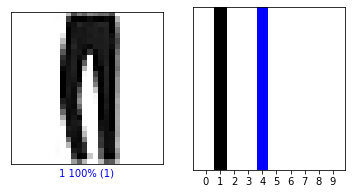

<Figure size 432x288 with 0 Axes>

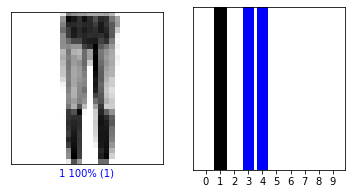

<Figure size 432x288 with 0 Axes>

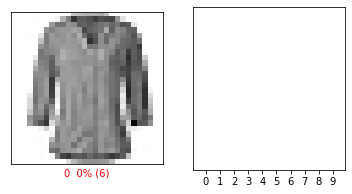

<Figure size 432x288 with 0 Axes>

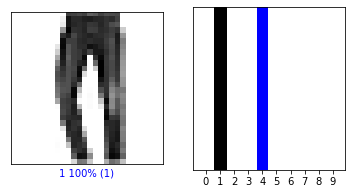

<Figure size 432x288 with 0 Axes>

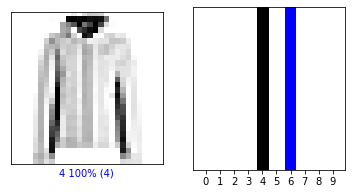

<Figure size 432x288 with 0 Axes>

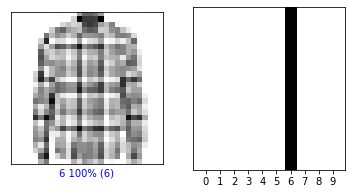

<Figure size 432x288 with 0 Axes>

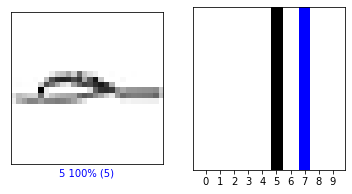

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(9):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction4[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, prediction4[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 5**

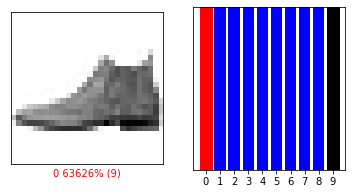

<Figure size 432x288 with 0 Axes>

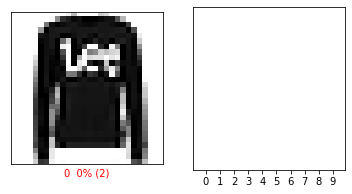

<Figure size 432x288 with 0 Axes>

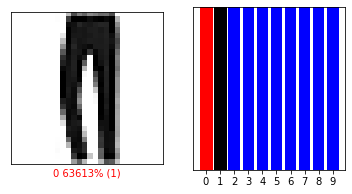

<Figure size 432x288 with 0 Axes>

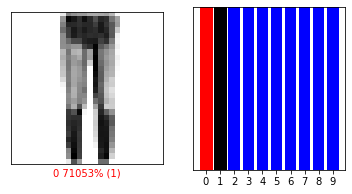

<Figure size 432x288 with 0 Axes>

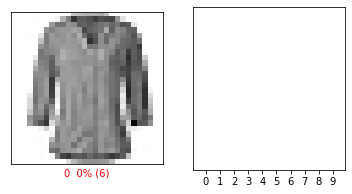

<Figure size 432x288 with 0 Axes>

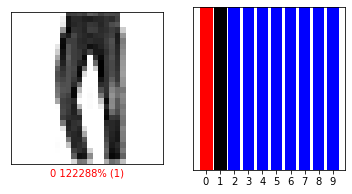

<Figure size 432x288 with 0 Axes>

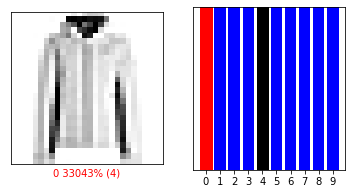

<Figure size 432x288 with 0 Axes>

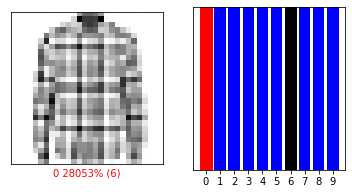

<Figure size 432x288 with 0 Axes>

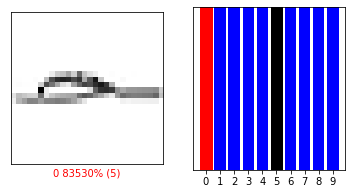

<Figure size 432x288 with 0 Axes>

In [ ]:
prediction5 = prediction5.flatten()
for i in range(9):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction5[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, prediction5[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 6**

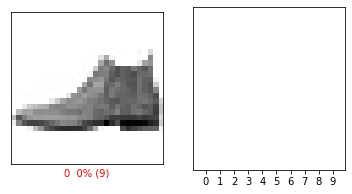

<Figure size 432x288 with 0 Axes>

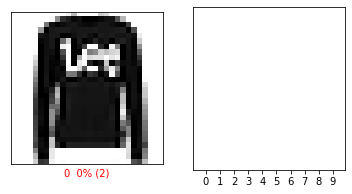

<Figure size 432x288 with 0 Axes>

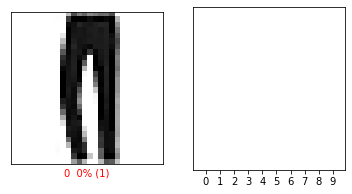

<Figure size 432x288 with 0 Axes>

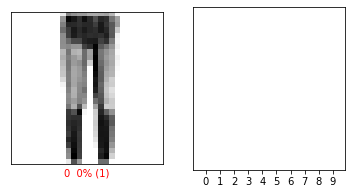

<Figure size 432x288 with 0 Axes>

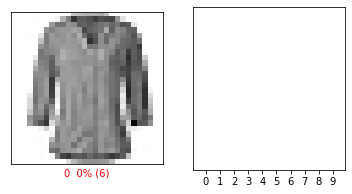

<Figure size 432x288 with 0 Axes>

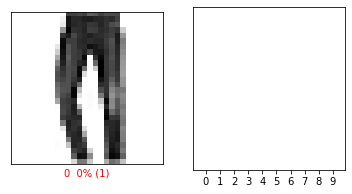

<Figure size 432x288 with 0 Axes>

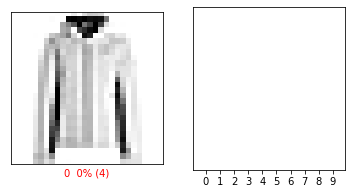

<Figure size 432x288 with 0 Axes>

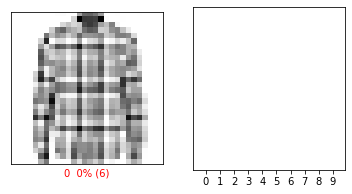

<Figure size 432x288 with 0 Axes>

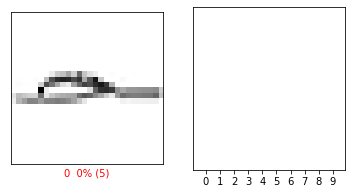

<Figure size 432x288 with 0 Axes>

In [ ]:
prediction6 = prediction6.flatten()
for i in range(9):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction6[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, prediction6[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 7**

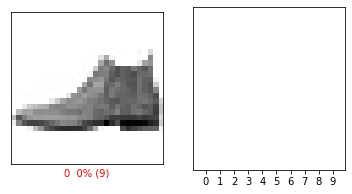

<Figure size 432x288 with 0 Axes>

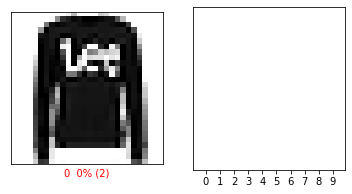

<Figure size 432x288 with 0 Axes>

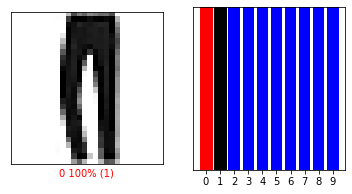

<Figure size 432x288 with 0 Axes>

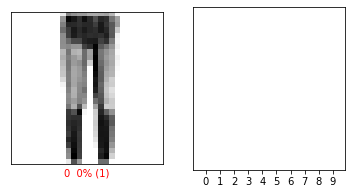

<Figure size 432x288 with 0 Axes>

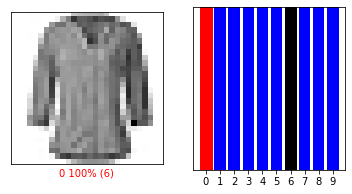

<Figure size 432x288 with 0 Axes>

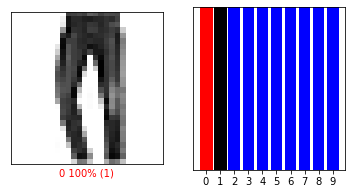

<Figure size 432x288 with 0 Axes>

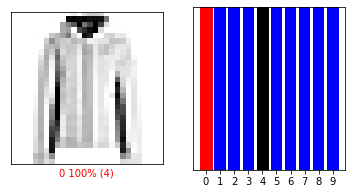

<Figure size 432x288 with 0 Axes>

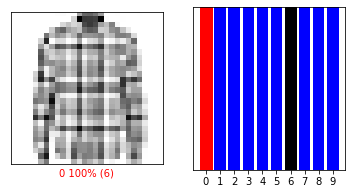

<Figure size 432x288 with 0 Axes>

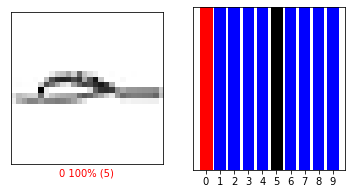

<Figure size 432x288 with 0 Axes>

In [ ]:
prediction7 = prediction7.flatten()
for i in range(9):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction7[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, prediction7[i],  test_labels)
  plt.show()
  plt.clf()

**Caso 5**

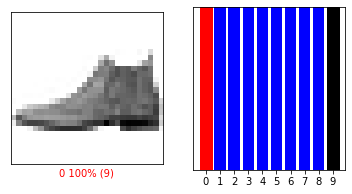

<Figure size 432x288 with 0 Axes>

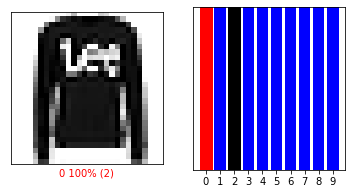

<Figure size 432x288 with 0 Axes>

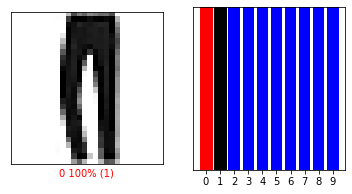

<Figure size 432x288 with 0 Axes>

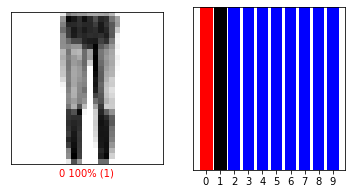

<Figure size 432x288 with 0 Axes>

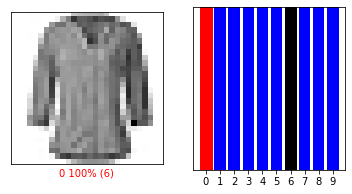

<Figure size 432x288 with 0 Axes>

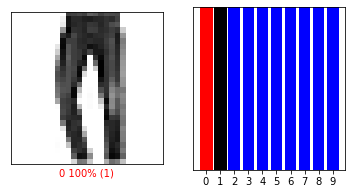

<Figure size 432x288 with 0 Axes>

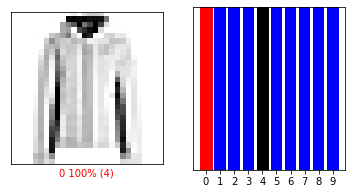

<Figure size 432x288 with 0 Axes>

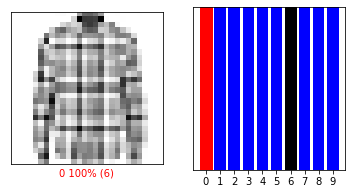

<Figure size 432x288 with 0 Axes>

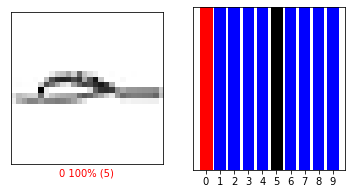

<Figure size 432x288 with 0 Axes>

In [ ]:
prediction8 = prediction8.flatten()
for i in range(9):
  plt.figure(figsize=(6,3))
  plt.subplot(1,2,1)
  plot_image(i, prediction8[i], test_labels, test_images.reshape(10000,28,28))
  plt.subplot(1,2,2)
  plot_value_array(i, prediction8[i],  test_labels)
  plt.show()
  plt.clf()

**El único que ha acertado es el modelo 4** Como ya se había interpretado en los apartados anteriores.

##Mejora del modelo

***7. Mejore el modelo usando el de la configuración del caso 3, pero cambiando el optimizador por ‘adam’ y la función de pérdida ‘sparse_categorical_crossentropy’. Buscar en internet las bases de dicho
optimizador y función de pérdida, explícalos con tus propias palabras y plantea tus reflexiones respecto al resultado.***

**Caso 3**

In [ ]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation='sigmoid')
])
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 16.6848 - accuracy: 0.7166
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 9.3199 - accuracy: 0.7811
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 7.8370 - accuracy: 0.7941
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 6.8482 - accuracy: 0.7950
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 6.1138 - accuracy: 0.8013


Con el optimizer 'adam' y loss='sparse_categorical_crossentropy' se obtiene una precisión muy similar, aunque la función de pérdida es mucho menos óptima que 'categorical_crossentropy' 

# CONCLUSIONES

A lo largo de este estudio de la Red de Neuronas Artificiales, se han probado diferentes combinaciones de funciones y herramientas internas de Keras con el fin de hallar los componentes que conllevan un entrenamiento óptimo.

Se ha concluido que el modelo más óptimo es el modelo 4 sin lugara a duda.

# REFLEXIONES

Este apartado de la práctica expone los acontecimientos y las dificultades que hemos encontrado como equipo durante su realización. Está compuesto de 3 secciones fuertemente relacionadas entre sí:

## 1.   Cómo hemos afrontado la solución de la práctica





Todo programa de carácter informático contiene dificultades técnicas tales como errores inesperados, o la búsqueda de funciones necesarias no conocidas hasta el momento. Por tanto, hemos tenido que afrontar la subsanación de algunos errores espontáneos, apoyándonos en las prácticas trabajadas en clase y cierta información útil de internet.

Asimismo, se ha logrado una mejor comprensión del funcionamiento de las Redes de Neuronas Artificiales debido a la necesidad de comparar de manera constante nuestro código y conclusiones, con aquellos de otros proyectos. Esto ha desencadenado también en conocer algunos conceptos nuevos gracias a ello.

## 2.   Cómo se ha dividido el trabajo

Anteriormente se han mencionado dificultades que han surgido. Otra de ellas ha sido la imposibilidad de trabajar con varios ordenadores al unísono, por lo que se han tenido que encontrar distintas estrategias a aquellas a las que solemos estar acostumbradas.

Una vez que se había logrado una estructura sólida del estudio, se decidió llevar a cabo el proyecto a através de videollamadas. Esta herramienta permitía a una de nosotras compartir el código por la pantalla, mientras que las demás ayudábamos buscando soluciones con nuestros respectivos ordenadores para avanzar de manera conjunta y eficiente.

A su vez, se compilaba en los demás ordenadores un avez se terminaban las secciones, para asegurarnos de haber subsanado cualquier error que pudiese haber surgido.

## 3.   Cómo se ha gestionado el equipo para trabajar

Siguiendo la línea argumental propuesta, y teniendo en cuenta las similitudes de este apartado con el anterior, explicaremos en más detalle las videollamadas mencionadas.

Nos asignábamos pequeñas tareas - que incluíamos en el proyecto mandándoselas a la compañera con el trabajo abierto, o esperando a incluirlas después - mientras avanzábamos con el código y las conclusiones con el fin de aprovechar el tiempo al máximo.

Sin embargo, tambiém se utilizó tiempo en el que nos encontrábamos físicamente juntas para continuar.

# REFERENCIAS BIBLIOGRÁFICAS

- Apuntes recogidos de GitHub y GoogleColab, a raíz de los contenidos estudiados en el aula